In [234]:
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [235]:
# Generate random data (1 feature)
X = np.random.rand(100, 1) * 10  # 100 samples, 1 feature

# True relationship (quadratic) plus some noise
y = 3 *X.flatten()**3 - 3 * X.flatten() + 1 + np.random.randn(100) * 500  # Quadratic relationship with noise


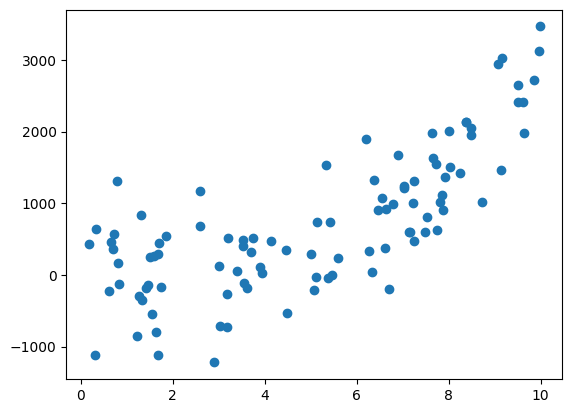

In [236]:
plt.scatter(X, y)
plt.show()

In [237]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),  # Step 1: Polynomial feature transformation
    ('sgd', SGDRegressor(max_iter=1000, eta0=0.1))  # Step 2: SGD Regressor
])


In [238]:
param_grid = {
    'poly__degree': [1, 2, 3, 4]         # Polynomial degree (1 for linear, 2 for quadratic, etc.)
}


In [239]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')


In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('poly', PolynomialFeatures()),
                                       ('sgd', SGDRegressor(eta0=0.1))]),
             param_grid={'poly__degree': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [241]:
print("Best Model:", grid_search.best_estimator_)


Best Model: Pipeline(steps=[('scaler', StandardScaler()), ('poly', PolynomialFeatures()),
                ('sgd', SGDRegressor(eta0=0.1))])


In [242]:
results_df = pd.DataFrame(grid_search.cv_results_)
results_df


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_poly__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002441,0.000424,0.001685,0.000554,1,{'poly__degree': 1},-485352.409620,-296489.398378,-2.735282e+05,-399205.461453,-563852.685504,-4.036856e+05,1.102497e+05,3
1,0.002017,0.001161,0.002720,0.002467,2,{'poly__degree': 2},-332627.159490,-232634.754415,-2.615741e+05,-273095.686431,-349988.097096,-2.899840e+05,4.427235e+04,1
2,0.001732,0.000790,0.001217,0.000460,3,{'poly__degree': 3},-381004.375793,-232611.549457,-2.973419e+05,-298670.876452,-356612.217001,-3.132482e+05,5.184422e+04,2
3,0.002109,0.000989,0.001566,0.000545,4,{'poly__degree': 4},-869400.540752,-233193.440784,-7.682440e+10,-431621.498034,-433434.838990,-1.536527e+10,3.072956e+10,4


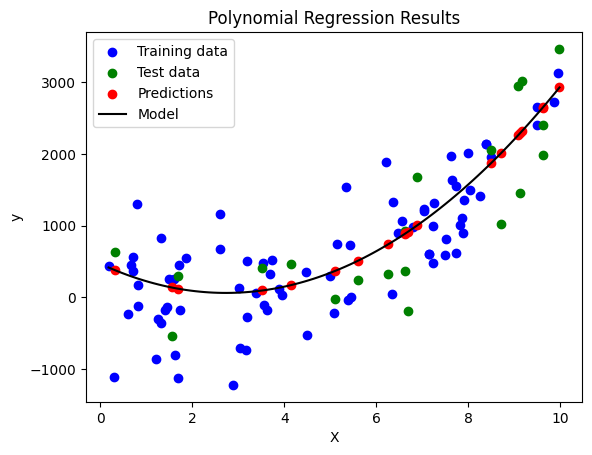

Model Coefficients (Weights): [139.67472482 619.92428195 440.86606531]
Model Intercept (Bias Term): [140.05058808]


In [243]:
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Plot the training data
plt.scatter(X_train, y_train, color='blue', label='Training data')

# Plot the test data
plt.scatter(X_test, y_test, color='green', label='Test data')

# Plot the predictions
plt.scatter(X_test, y_pred, color='red', label='Predictions')

# Plot the line result
X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_line = best_model.predict(X_line)
plt.plot(X_line, y_line, color='black', label='Model')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Polynomial Regression Results')
plt.show()


sgd_model = best_model.named_steps['sgd']  # Access the SGDRegressor from the pipeline

# Print the coefficients (weights) and intercept (bias term)
print("Model Coefficients (Weights):", sgd_model.coef_)
print("Model Intercept (Bias Term):", sgd_model.intercept_)


In [244]:
print(np.random.random())

0.15940520280696902
